<img src='letscodebr_cover.jpeg' align='left' width=100%/>

# Ada Tech [DS-PY-004] Técnicas de Programação I (PY) Aulas 4 e 5 : GeoPandas - GeoDataFrame.

In [1]:
import pandas as pd
import geopandas as gpd
import matplotlib.pyplot as plt
import descartes

###  Intro

O [Geopandas](https://geopandas.org/getting_started/introduction.html) é uma biblioteca que permite trabalhar com dados geoespaciais em Python. Para fazer isso, ele usa recursos de outras bibliotecas Python.

- Estende a funcionalidade do [pandas](https://towardsdatascience.com/geospatial-adventures-step-2-pandas-vs-geopandas-16e842d0e3a7). Em outras palavras, todas as operações que se aplicam a *Series* e *DataFrame* podem ser realizadas.

- Fornece uma interface com a biblioteca [matplotlib](https://towardsdatascience.com/mapping-with-matplotlib-pandas-geopandas-and-basemap-in-python-d11b57ab5dac) para gerar mapas. As figuras geométricas podem ser facilmente mapeadas com o método `plot()`.

- Permite operações em dados geométricos que representam dados espaciais (pontos, linhas e polígonos). Para isso, faz uso da biblioteca [shapely](https://www.learndatasci.com/tutorials/geospatial-data-python-geopandas-shapely/).

- Facilita o acesso aos dados em múltiplos *formatos de arquivo*, ampliando as operações fornecidas pela biblioteca [fiona](https://pythonrepo.com/repo/Toblerity-Fiona-python-geolocation)

- Faz projeções, ou seja, permite utilizar diferentes tipos de coordenadas para referenciar a posição geográfica dos dados geoespaciais.

Vamos analisar cada um desses pontos com mais detalhes.

### GeoSeries e GeoDataFrame

Assim como *Pandas* tem *Series* e *Dataframe* como estrutura de dados, o *Geopandas* tem algo semelhante chamado [Geoseries](https://geopandas.org/docs/reference/geoseries.html) e [GeoDataFrame](https://geopandas.org/gallery/create_geopandas_from_pandas.html).

A diferença entre eles é que **GeoSeries** e **GeoDataFrame** devem conter pelo menos uma coluna com tipos de dados geoespaciais. Esta coluna é chamada por padrão de [geometry](https://automating-gis-processes.github.io/site/notebooks/L2/geopandas-basics.html).

A coluna *geometry* contém uma forma geométrica que representa a posição espacial do objeto. Por exemplo, a posição espacial de uma empresa - suas coordenadas - são expressas pela forma geométrica *ponto*.

As formas geométricas são:

- POINT. Um ponto
- LINESTRING. Uma linha
- POLYGON. Uma superfície

Coleções de formas também podem ser representadas:

- MULTIPOINT. Vários pontos
- MULTILINESTRING. Múltiplas linhas
- MULTIPOLYGON. Múltiplas superfícies

Em [geodatos](https://www.geodatos.net/en/coordinates) você pode pesquisar as coordenadas das cidades do mundo.

### Cidades

Começamos gerando um `dataframe Pandas` com os dados da cidade. Observe que os dados geográficos de latitude e longitude são incluídos como *números*, para localizar cidades no espaço.

In [2]:
df_cidade = pd.DataFrame(
    {'Cidade': ['São Paulo', 'Rio de Janeiro', 'Salvador', 'Belo Horizonte', 'Manaus','Campo Grande', 'Florianópolis'],
     'Estado': ['SP', 'RJ', 'BA', 'MG', 'AM', 'MS', 'SC'],
     'Latitude':  [-23.5558, -22.9068, -12.9777, -19.9191, -3.1190, -20.4649, -27.5948],
     'Longitude': [-46.6396, -43.1729, -38.5016, -43.9387, -60.0217, -54.6218, -48.5569]})

In [3]:
type(df_cidade)

pandas.core.frame.DataFrame

In [4]:
df_cidade.dtypes

Cidade        object
Estado        object
Latitude     float64
Longitude    float64
dtype: object

Como a latitude e a longitude são numéricas, elas devem ser transformadas em uma forma geométrica para poder representá-las como dados geoespaciais.

O Geopandas faz isso com o método [`geopandas.points_from_xy()`](https://geopandas.org/docs/reference/api/geopandas.points_from_xy.html), gerando a forma geométrica **POINT**.

**IMPORTANTE:** este método possui dois parâmetros, o primeiro, $x$, deve receber a **longitude**, e o segundo, $y$, a deve receber **latitude**. Você pode logicamente pensar que deveria ser o contrário.

In [5]:
geometria = gpd.points_from_xy(df_cidade.Longitude, 
                               df_cidade.Latitude
                              )
geometria

<GeometryArray>
[ <POINT (-46.64 -23.556)>, <POINT (-43.173 -22.907)>,
 <POINT (-38.502 -12.978)>, <POINT (-43.939 -19.919)>,
  <POINT (-60.022 -3.119)>, <POINT (-54.622 -20.465)>,
 <POINT (-48.557 -27.595)>]
Length: 7, dtype: geometry

Agora transformamos o `dataframe` `df_cidade` em um `geoDataFrame` chamado `geo_bra`; os dados do dataframe são combinados com a variável recém-criada *geometry* (as coordenadas da cidade como uma forma geométrica).

Lembre-se de que os tipos de dados `GeoDataFrame` requerem pelo menos uma coluna com uma forma geométrica. Recomenda-se chamá-lo de *geometry*, pois é o padrão para salvar este tipo de dados.

In [6]:
geo_bra = gpd.GeoDataFrame(df_cidade, 
                           geometry = geometria
                          )

In [7]:
geo_bra.dtypes

Cidade         object
Estado         object
Latitude      float64
Longitude     float64
geometry     geometry
dtype: object

In [8]:
geo_bra

,Cidade,Estado,Latitude,Longitude,geometry
0,São Paulo,SP,-23.5558,-46.6396,POINT (-46.63960 -23.55580)
1,Rio de Janeiro,RJ,-22.9068,-43.1729,POINT (-43.17290 -22.90680)
2,Salvador,BA,-12.9777,-38.5016,POINT (-38.50160 -12.97770)
3,Belo Horizonte,MG,-19.9191,-43.9387,POINT (-43.93870 -19.91910)
4,Manaus,AM,-3.1190,-60.0217,POINT (-60.02170 -3.11900)
5,Campo Grande,MS,-20.4649,-54.6218,POINT (-54.62180 -20.46490)
6,Florianópolis,SC,-27.5948,-48.5569,POINT (-48.55690 -27.59480)


### Países

Cada pais se representa por sus límites, o contornos. Dentro del tipo de datos geoespacial, usa la forma *POLYGON* o *MULTIPOLYGON*. Geopandas permite leerlos desde un archivo especial llamado *naturalearth_lowres*

Este archivo se guarda en una variable del tipo GeoDataFrame, ya que contiene una columna geometry con los polígonos de cada páis, sus contornos.

Cada país é representado por suas fronteiras ou contornos. No tipo de dados geoespaciais, use o formato *POLYGON* ou *MULTIPOLYGON*. O `Geopandas` permite a leitura de um arquivo especial chamado `naturalearth_lowres`.

Este arquivo é salvo em uma variável do tipo `GeoDataFrame`, pois contém uma coluna geométrica com os polígonos de cada país, seus contornos.

Por que alguns países precisam de um MULTIPOLIGONO em vez de simplesmente um POLIGONO?

In [9]:
world = gpd.read_file(gpd.datasets.get_path('naturalearth_lowres'))
world.head()

/var/folders/cz/8wxdxxx55vz69s8s08w90yvh0000gn/T/ipykernel_32177/913829029.py:1: FutureWarning: The geopandas.dataset module is deprecated and will be removed in GeoPandas 1.0. You can get the original 'naturalearth_lowres' data from https://www.naturalearthdata.com/downloads/110m-cultural-vectors/.
  world = gpd.read_file(gpd.datasets.get_path('naturalearth_lowres'))


,pop_est,continent,name,iso_a3,gdp_md_est,geometry
0,889953.0,Oceania,Fiji,FJI,5496,"MULTIPOLYGON (((180.00000 -16.06713, 180.00000..."
1,58005463.0,Africa,Tanzania,TZA,63177,"POLYGON ((33.90371 -0.95000, 34.07262 -1.05982..."
2,603253.0,Africa,W. Sahara,ESH,907,"POLYGON ((-8.66559 27.65643, -8.66512 27.58948..."
3,37589262.0,North America,Canada,CAN,1736425,"MULTIPOLYGON (((-122.84000 49.00000, -122.9742..."
4,328239523.0,North America,United States of America,USA,21433226,"MULTIPOLYGON (((-122.84000 49.00000, -120.0000..."


In [10]:
type(world)

geopandas.geodataframe.GeoDataFrame

In [11]:
world.head()

,pop_est,continent,name,iso_a3,gdp_md_est,geometry
0,889953.0,Oceania,Fiji,FJI,5496,"MULTIPOLYGON (((180.00000 -16.06713, 180.00000..."
1,58005463.0,Africa,Tanzania,TZA,63177,"POLYGON ((33.90371 -0.95000, 34.07262 -1.05982..."
2,603253.0,Africa,W. Sahara,ESH,907,"POLYGON ((-8.66559 27.65643, -8.66512 27.58948..."
3,37589262.0,North America,Canada,CAN,1736425,"MULTIPOLYGON (((-122.84000 49.00000, -122.9742..."
4,328239523.0,North America,United States of America,USA,21433226,"MULTIPOLYGON (((-122.84000 49.00000, -120.0000..."



### Integrando o país com as cidades

Agora criamos o mapa do Brasil com as cidades. Para fazer gráficos, o método [`plot()`](https://geopandas.org/docs/user_guide/mapping.html) da variável geo_bra GeoDataFrame é usado, que *desenha a forma encontrada na coluna de geometry*.

Para desenhar o país, junte as coordenadas do polígono que representa as fronteiras do país. Para desenhar as cidades, já que só tem uma coordenada, gere um ponto.

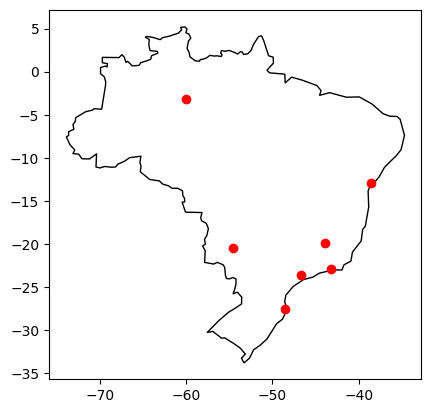

In [12]:
# Mapa do Brasil
ax = world[world.name == 'Brazil'].plot(color = 'white', 
                                        edgecolor = 'black'
                                       )

# Sobre as cidades se sobrepõem o mapa do país
geo_bra.plot(ax = ax, 
             color = 'red'
            )

plt.show()

Tente desenhar a cidade de Rio Branco, no estado do Acre, no mapa do Brasil. <br> 

Sua localização geográfica é:

- Latitude = -9.0238
- Longitude: -70.8120

### Extra: Capitais de países

Assim como há um arquivo para as figuras dos países, há outro para os pontos (coordenadas) das capitais dos países.

In [13]:
gpd.datasets.available

['naturalearth_cities', 'naturalearth_lowres', 'nybb']

In [14]:
world_cities = gpd.read_file(gpd.datasets.get_path('naturalearth_cities'))
world_cities.head()

/var/folders/cz/8wxdxxx55vz69s8s08w90yvh0000gn/T/ipykernel_32177/1091697464.py:1: FutureWarning: The geopandas.dataset module is deprecated and will be removed in GeoPandas 1.0. You can get the original 'naturalearth_cities' data from https://www.naturalearthdata.com/downloads/110m-cultural-vectors/.
  world_cities = gpd.read_file(gpd.datasets.get_path('naturalearth_cities'))


,name,geometry
0,Vatican City,POINT (12.45339 41.90328)
1,San Marino,POINT (12.44177 43.93610)
2,Vaduz,POINT (9.51667 47.13372)
3,Lobamba,POINT (31.20000 -26.46667)
4,Luxembourg,POINT (6.13000 49.61166)


### Referências


- [GeoPandas 0.9.0](https://geopandas.org/index.html)

- [The GeoPandas Cookbook](https://www.martinalarcon.org/2018-12-31-d-geopandas)

- [The Shapely User Manual](https://shapely.readthedocs.io/en/stable/manual.html)